In [98]:
from pyspark.sql import SparkSession
import pandas as pd
import numpy as np
import pyspark.sql as sparksql
import warnings
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
%matplotlib inline
plt.rcParams['figure.figsize']=8,4

warnings.filterwarnings('ignore')
#from pyspark_dist_explore import pandas_histogram

# initialise sparkContext
spark = SparkSession.builder \
    .master('local') \
    .appName('isd_lite_data') \
    .config('spark.executor.memory', '14gb') \
    .config("spark.cores.max", "6") \
    .getOrCreate()

sc = spark.sparkContext

# using SQLContext to read parquet file
from pyspark.sql import SQLContext
sqlContext = SQLContext(sc)

# to read parquet file
#df = sqlContext.read.parquet('C:\Scala_IDE_Eclipse\eclipse\Scala_projects\ATT_Interview_Project\ATT\parquet\isd_lite_data.parquet')
#df = pd.read_parquet('C:\\Scala_IDE_Eclipse\\eclipse\\Scala_projects\\ATT_Interview_Project\\ATT\\parquet\\isd_lite_data.parquet', engine='pyarrow')
df = sqlContext.read.parquet('C:\Scala_IDE_Eclipse\eclipse\Scala_projects\ISD_Data_Extract\ATT\parquet\isd_lite_data.parquet')
df.show()

+--------------------+-----+---+----+-----+-----+--------+----------+------+-------+-----------------+-----------------+----+
|            FileName|Month|Day|Hour|ATemp|DTemp|SeaPress|WDirection|WSpeed|SkyCond|LiquidPrecOneHour|LiquidPrecSixHour|Year|
+--------------------+-----+---+----+-----+-----+--------+----------+------+-------+-----------------+-----------------+----+
|file:/C:/Scala_ID...|   01| 01|  00|  -57|  -62|   10301|       180|    15|      9|            -9999|                0|2017|
|file:/C:/Scala_ID...|   01| 01|  01|  -59|  -64|   10293|       170|     5|      9|                0|            -9999|2017|
|file:/C:/Scala_ID...|   01| 01|  02|  -57|  -61|   10286|       190|    10|      9|                0|            -9999|2017|
|file:/C:/Scala_ID...|   01| 01|  03|  -54|  -58|   10282|       180|    10|      9|            -9999|            -9999|2017|
|file:/C:/Scala_ID...|   01| 01|  04|  -49|  -53|   10275|       230|    15|      9|                0|            -999

In [99]:
#Trimming the filename column to extract the station code. Prepping the Data Frame for analysis.
dfIsdData = df.toPandas()
dfIsdData.columns = ['Station_Code','Month','Day','Hour','Air_Temp' \
,'Dew_Point_Temp','Sea_Pressure', 'Wind_Direction', 'Wind_Speed', 'Sky_Condition' \
,'Liquid_Precipitation_One_Hour', 'Liquid_Precipitation_Six_Hour', 'Year']
dfIsdData['Station_Code']= dfIsdData['Station_Code'].str[-20:].str[:6] # - Station code extraction from file name
dfIsdData

,Station_Code,Month,Day,Hour,Air_Temp,Dew_Point_Temp,Sea_Pressure,Wind_Direction,Wind_Speed,Sky_Condition,Liquid_Precipitation_One_Hour,Liquid_Precipitation_Six_Hour,Year
0,071810,01,01,00,-57,-62,10301,180,15,9,-9999,0,2017
1,071810,01,01,01,-59,-64,10293,170,5,9,0,-9999,2017
2,071810,01,01,02,-57,-61,10286,190,10,9,0,-9999,2017
3,071810,01,01,03,-54,-58,10282,180,10,9,-9999,-9999,2017
4,071810,01,01,04,-49,-53,10275,230,15,9,0,-9999,2017
5,071810,01,01,05,-47,-51,10268,200,15,8,0,-9999,2017
6,071810,01,01,06,-47,-51,10265,210,15,8,-9999,-9999,2017
7,071810,01,01,07,-48,-52,10259,200,15,8,0,-9999,2017
8,071810,01,01,08,-52,-56,10256,190,15,6,0,-9999,2017
9,071810,01,01,09,-42,-45,10251,180,15,8,-9999,-9999,2017


In [53]:
# information on the columns
dfIsdData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78231 entries, 0 to 78230
Data columns (total 13 columns):
Station_Code                     78231 non-null object
Month                            78231 non-null object
Day                              78231 non-null object
Hour                             78231 non-null object
Air_Temp                         78231 non-null object
Dew_Point_Temp                   78231 non-null object
Sea_Pressure                     78231 non-null object
Wind_Direction                   78231 non-null object
Wind_Speed                       78231 non-null object
Sky_Condition                    78231 non-null object
Liquid_Precipitation_One_Hour    78231 non-null object
Liquid_Precipitation_Six_Hour    78231 non-null object
Year                             78231 non-null int32
dtypes: int32(1), object(12)
memory usage: 7.5+ MB


In [54]:
# number of rows
len(dfIsdData)

78231

In [55]:
#Filter for year = 2018
dfIsdData[dfIsdData.Year == 2017]

,Station_Code,Month,Day,Hour,Air_Temp,Dew_Point_Temp,Sea_Pressure,Wind_Direction,Wind_Speed,Sky_Condition,Liquid_Precipitation_One_Hour,Liquid_Precipitation_Six_Hour,Year
0,071810,01,01,00,-57,-62,10301,180,15,9,-9999,0,2017
1,071810,01,01,01,-59,-64,10293,170,5,9,0,-9999,2017
2,071810,01,01,02,-57,-61,10286,190,10,9,0,-9999,2017
3,071810,01,01,03,-54,-58,10282,180,10,9,-9999,-9999,2017
4,071810,01,01,04,-49,-53,10275,230,15,9,0,-9999,2017
5,071810,01,01,05,-47,-51,10268,200,15,8,0,-9999,2017
6,071810,01,01,06,-47,-51,10265,210,15,8,-9999,-9999,2017
7,071810,01,01,07,-48,-52,10259,200,15,8,0,-9999,2017
8,071810,01,01,08,-52,-56,10256,190,15,6,0,-9999,2017
9,071810,01,01,09,-42,-45,10251,180,15,8,-9999,-9999,2017


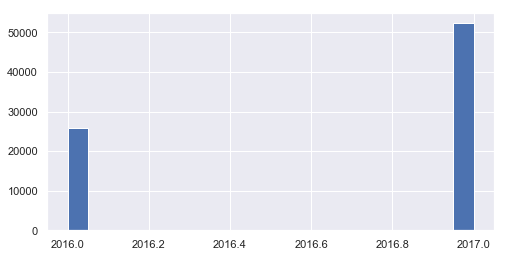

In [56]:
#This below shows the number of rows per year.
#vis1 = sns.distplot(pd.to_numeric(dfIsdData["Year"]))
vis1Plt = plt.hist(pd.to_numeric(dfIsdData["Year"]), bins=20)

In [100]:
#Prepping the Data
dfIsdData["Year"] = pd.to_numeric(dfIsdData["Year"])
dfIsdData["Station_Code"] = pd.to_numeric(dfIsdData["Station_Code"])
dfIsdData["Month"] = pd.to_numeric(dfIsdData["Month"])
dfIsdData["Day"] = pd.to_numeric(dfIsdData["Day"])
dfIsdData["Hour"] = pd.to_numeric(dfIsdData["Hour"])
dfIsdData["Air_Temp"] = pd.to_numeric(dfIsdData["Air_Temp"])
dfIsdData["Dew_Point_Temp"] = pd.to_numeric(dfIsdData["Dew_Point_Temp"])
dfIsdData["Sea_Pressure"] = pd.to_numeric(dfIsdData["Sea_Pressure"])
dfIsdData["Wind_Direction"] = pd.to_numeric(dfIsdData["Wind_Direction"])
dfIsdData["Wind_Speed"] = pd.to_numeric(dfIsdData["Wind_Speed"])
dfIsdData["Sky_Condition"] = pd.to_numeric(dfIsdData["Sky_Condition"])
dfIsdData["Liquid_Precipitation_One_Hour"] = pd.to_numeric(dfIsdData["Liquid_Precipitation_One_Hour"])
dfIsdData["Liquid_Precipitation_Six_Hour"] = pd.to_numeric(dfIsdData["Liquid_Precipitation_Six_Hour"])
dfIsdData = dfIsdData[((dfIsdData.Air_Temp != -9999) & dfIsdData.Wind_Speed) != -9999 & \
                      (dfIsdData.Wind_Direction != -9999) & (dfIsdData.Dew_Point_Temp != -9999) & \
                      (dfIsdData.Sea_Pressure != -9999) & (dfIsdData.Sky_Condition != -9999) & \
                      (dfIsdData.Liquid_Precipitation_One_Hour != -9999) & (dfIsdData.Liquid_Precipitation_Six_Hour != -9999)]


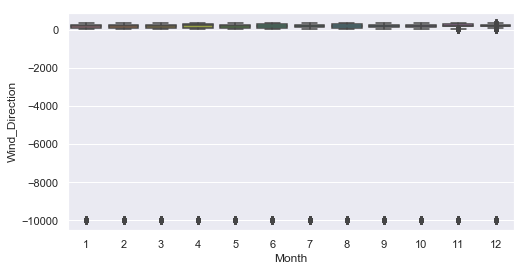

In [58]:
#BoxPlots
#dfIsdData.boxplot(column='Sky Condition',layout=(1,9), figsize=(20,10), whis=[5,95])
dfIsdDataBP = dfIsdData[(dfIsdData.Year == 2017)]
dfIsdDataBP.groupby(['Year', 'Month'])['Wind_Direction'].max()
vis2 = sns.boxplot(data=dfIsdDataBP, x=dfIsdDataBP["Month"], y=dfIsdDataBP["Wind_Direction"])
#vis2.set(xlabel='Max Value Hourly basis', ylabel='Wind Direction')

In [59]:
#BoxPlots
#dfIsdData["Station_Code"] = pd.to_numeric(dfIsdData["Station_Code"])
#dfIsdData["Year"] = pd.to_numeric(dfIsdData["Year"])

#f, (ax) = plt.subplots(1, 1, figsize=(12, 4))
#f.suptitle('Year - Station_Code', fontsize=14)

#sns.boxplot(x="Station_Code", y="Year", data=dfIsdData,  ax=ax)
#ax.set_xlabel("Station_Code",size = 12,alpha=0.8)
#ax.set_ylabel("Year",size = 12,alpha=1.0)

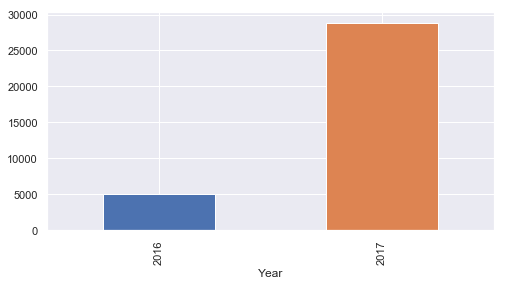

In [60]:
#This below shows the number of stations data captured per year.
dfIsdData.groupby(['Year'])['Year'].count().plot(kind='bar')

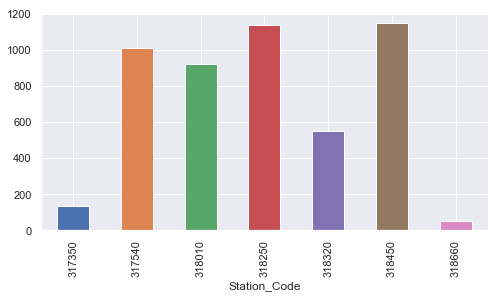

In [61]:
#In a particular year, how much data is captured at each station
dfIsdDataBar = dfIsdData[(dfIsdData.Year == 2016)]
dfIsdDataBar.groupby(['Station_Code'])['Station_Code'].count().plot(kind='bar')

(5, 51)

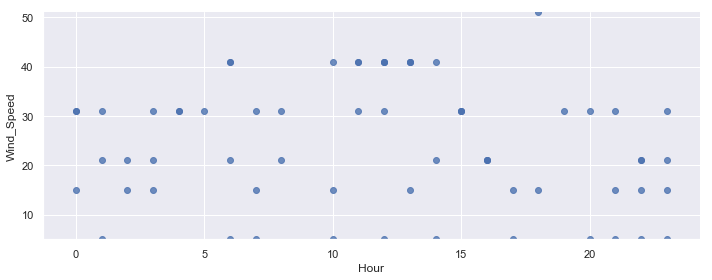

In [62]:
#Wind_Speed hourly
dfIsdDataCompare = dfIsdData[(dfIsdData.Year == 2017) & (dfIsdData.Month == 1) & (dfIsdData.Day == 20)]
vis3 = sns.lmplot(data=dfIsdDataCompare,x='Hour',y='Wind_Speed', fit_reg=False, size = 4, aspect = 2.5)
vis3.axes[0,0].set_ylim(min(dfIsdDataCompare.Wind_Speed), max(dfIsdDataCompare.Wind_Speed))

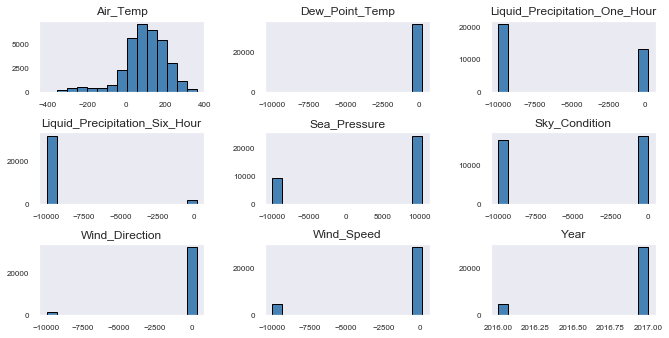

In [63]:
cols = ['Air_Temp' \
,'Dew_Point_Temp','Sea_Pressure', 'Wind_Direction', 'Wind_Speed', 'Sky_Condition' \
,'Liquid_Precipitation_One_Hour', 'Liquid_Precipitation_Six_Hour', 'Year']
dfIsdDataBar2 = dfIsdData[cols]
dfIsdDataBar2[cols].hist(bins=15, color='steelblue', edgecolor='black', linewidth=1.0,
           xlabelsize=8, ylabelsize=8, grid=False)    
plt.tight_layout(rect=(0, 0, 1.2, 1.2))  

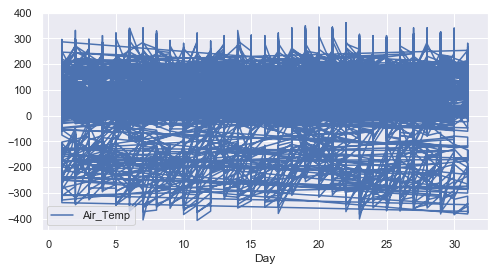

In [126]:
#Time Series for a month in a year - Air_Temp
dfIsdDataTS = dfIsdData[(dfIsdData.Year == 2017)]
dfIsdDataTS = dfIsdData[(dfIsdData.Month == 2)]

dfIsdDataTS.groupby(['Station_Code','Month','Day'])['Air_Temp'].max()
cols = ['Day', 'Air_Temp']
dfIsdDataTS = dfIsdData[cols]
dfIsdDataTS.set_index('Day').plot()

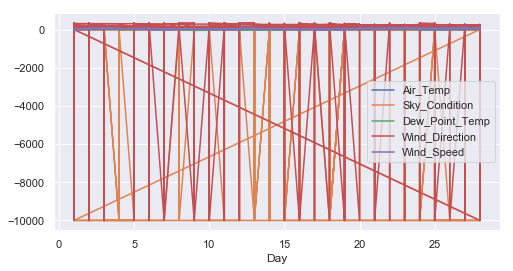

In [127]:
#Time Series for a month in a year
dfIsdDataTS2 = dfIsdData[(dfIsdData.Year == 2017)]
dfIsdDataTS2 = dfIsdDataTS2[(dfIsdDataTS2.Month == 2)]

dfIsdDataTS2.groupby(['Station_Code','Month','Day'])['Air_Temp'].max()
cols = ['Day', 'Air_Temp', 'Sky_Condition', 'Dew_Point_Temp', 'Wind_Direction', 'Wind_Speed']
dfIsdDataTS2 = dfIsdDataTS2[cols]
dfIsdDataTS2.set_index('Day').plot()

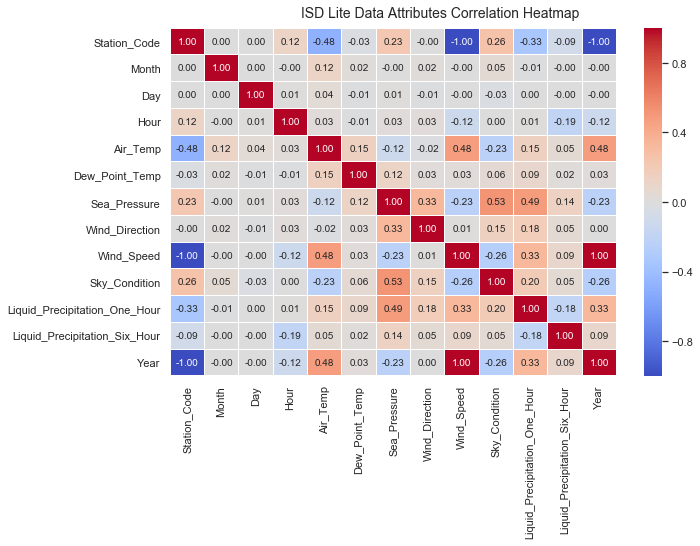

In [122]:
# Correlation Matrix Heatmap - showing the correlation between all attributes
f, ax = plt.subplots(figsize=(10, 6))
corr = dfIsdData.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('ISD Lite Data Attributes Correlation Heatmap', fontsize=14)

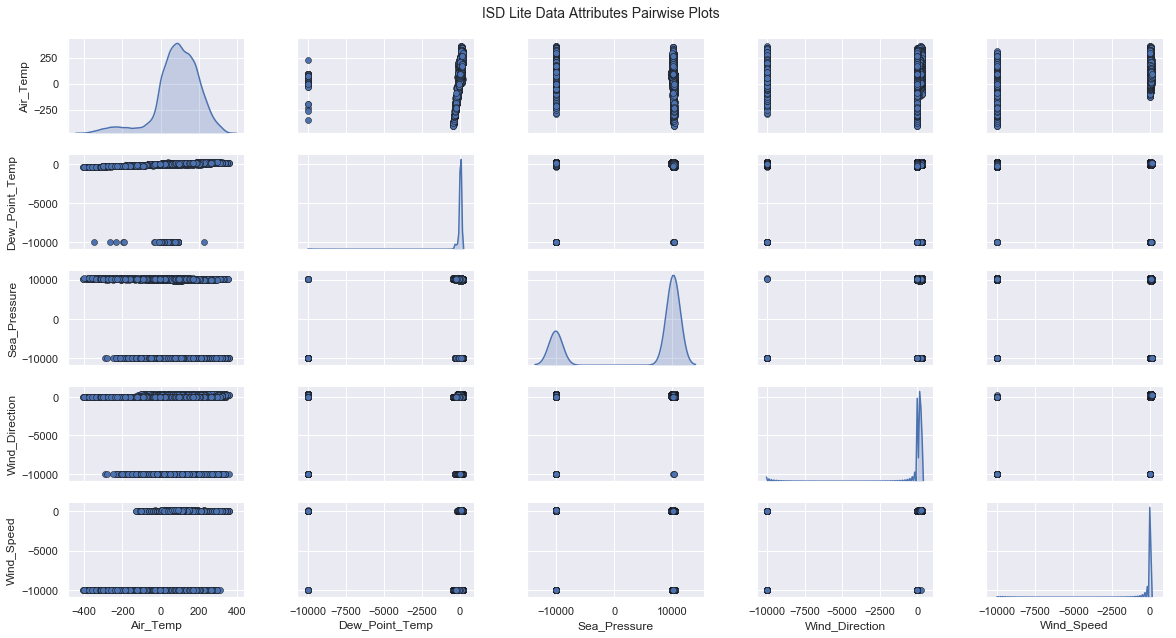

In [123]:
# Pair-wise Scatter Plots
cols = ['Air_Temp' \
,'Dew_Point_Temp','Sea_Pressure', 'Wind_Direction', 'Wind_Speed'] #'Sky_Condition' \
#,'Liquid_Precipitation_One_Hour', 'Liquid_Precipitation_Six_Hour']

pp = sns.pairplot(dfIsdData[cols], size=1.8, aspect=1.8,
                  plot_kws=dict(edgecolor="k", linewidth=0.5),
                  diag_kind="kde", diag_kws=dict(shade=True))

fig = pp.fig 
fig.subplots_adjust(top=0.93, wspace=0.3)
t = fig.suptitle('ISD Lite Data Attributes Pairwise Plots', fontsize=14)

Text(0, 0.5, 'Air_Temp')

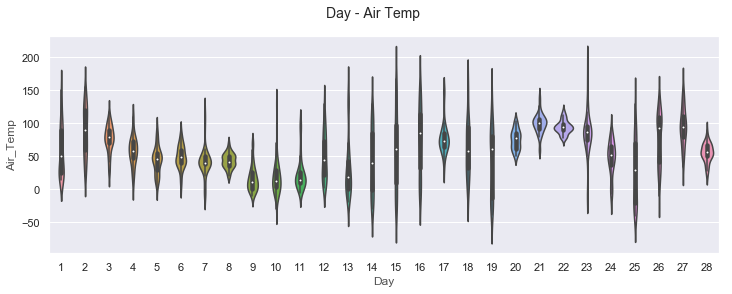

In [129]:
# Violin Plots
dfIsdDataV = dfIsdData[(dfIsdData.Year == 2017)]
dfIsdDataV = dfIsdDataV[(dfIsdDataV.Month == 2)]

dfIsdDataV.groupby(['Station_Code','Month','Day'])['Air_Temp'].max()
cols = ['Day', 'Air_Temp']
dfIsdDataV = dfIsdDataV[cols]
f, (ax) = plt.subplots(1, 1, figsize=(12, 4))
f.suptitle('Day - Air Temp', fontsize=14)

sns.violinplot(x="Day", y="Air_Temp", data=dfIsdDataV,  ax=ax)
ax.set_xlabel("Day",size = 12,alpha=0.8)
ax.set_ylabel("Air_Temp",size = 12,alpha=0.8)